# library import

### 필요 라이브러리 설치(필요시 주석 해제 후 실행)

In [1]:
# !pip install tqdm
# !pip install seaborn
# !pip install statsmodels --upgrade.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# load data

In [6]:
# cd '/content/drive/Shareddrives/PHME2022/dataset/Data-Challenge-2022' # for colab

/content/drive/Shareddrives/PHME2022/dataset/Data-Challenge-2022


In [12]:
data_dir = os.path.join('./data')
file_list = os.listdir(data_dir)
file_list = [f for f in file_list if f.endswith('.csv')]
file_list.sort()
file_list

In [13]:
aoi = pd.read_csv(os.path.join(data_dir,file_list[0]))
# spi = pd.read_csv(os.path.join(data_dir,file_list[1]))
spi_0 = pd.read_csv(os.path.join(data_dir,file_list[1]))
spi_1 = pd.read_csv(os.path.join(data_dir,file_list[2]))
spi_2 = pd.read_csv(os.path.join(data_dir,file_list[3]))
spi_3 = pd.read_csv(os.path.join(data_dir,file_list[4]))


In [14]:
spi = pd.concat([spi_0,spi_1,spi_2,spi_3],axis=0) # concat 4 spi data
spi.FigureID.fillna(0,inplace=True)
condition = (spi['Shape(um)'] == 'n')
spi['Shape(um)'][condition] = 0
spi = spi.astype({'FigureID':'int','PadID':'object','PadType':'object','Shape(um)':'float'})
spi.drop(['Time','Date'], axis = 1,inplace=True) # Data is meaningless data
spi.loc[spi[spi.PinNumber == 'THERMAL1'].index, 'PinNumber'] = 0
spi = spi.astype({'PinNumber':'int'})
spi['Binary_Result'] = np.where(spi['Result'] == "GOOD", 0, 1)

In [15]:
spi.Result.unique()

array(['GOOD', 'W.Excessive', 'W.Insuffi.', 'E.Shape', 'E.Position',
       'E.Bridging', 'E.Exessive', 'E.HeightU', 'W.HeightU', 'E.Insuffi.',
       'W.Position', 'E.AreaL'], dtype=object)

In [16]:
spi.Binary_Result.groupby(spi.FigureID).sum()

FigureID
0        0
1     3695
2     6933
3     7645
4    14259
5     5696
6    13275
7    11698
8    11793
Name: Binary_Result, dtype: int64

## EDA

In [17]:
spi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985382 entries, 0 to 1496346
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PanelID        object 
 1   FigureID       int64  
 2   ComponentID    object 
 3   PinNumber      int64  
 4   PadID          object 
 5   PadType        object 
 6   Volume(%)      float64
 7   Height(um)     float64
 8   Area(%)        float64
 9   OffsetX(%)     float64
 10  OffsetY(%)     float64
 11  SizeX          float64
 12  SizeY          float64
 13  Volume(um3)    float64
 14  Area(um2)      float64
 15  Shape(um)      float64
 16  PosX(mm)       float64
 17  PosY(mm)       float64
 18  Result         object 
 19  Binary_Result  int64  
dtypes: float64(12), int64(3), object(5)
memory usage: 991.2+ MB


In [18]:
aoi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31617 entries, 0 to 31616
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PanelID        31617 non-null  object 
 1   FigureID       31617 non-null  int64  
 2   MachineID      31617 non-null  object 
 3   ComponentID    31617 non-null  object 
 4   PinNumber      22493 non-null  float64
 5   AOILabel       31617 non-null  object 
 6   OperatorLabel  31617 non-null  object 
 7   RepairLabel    1356 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.9+ MB


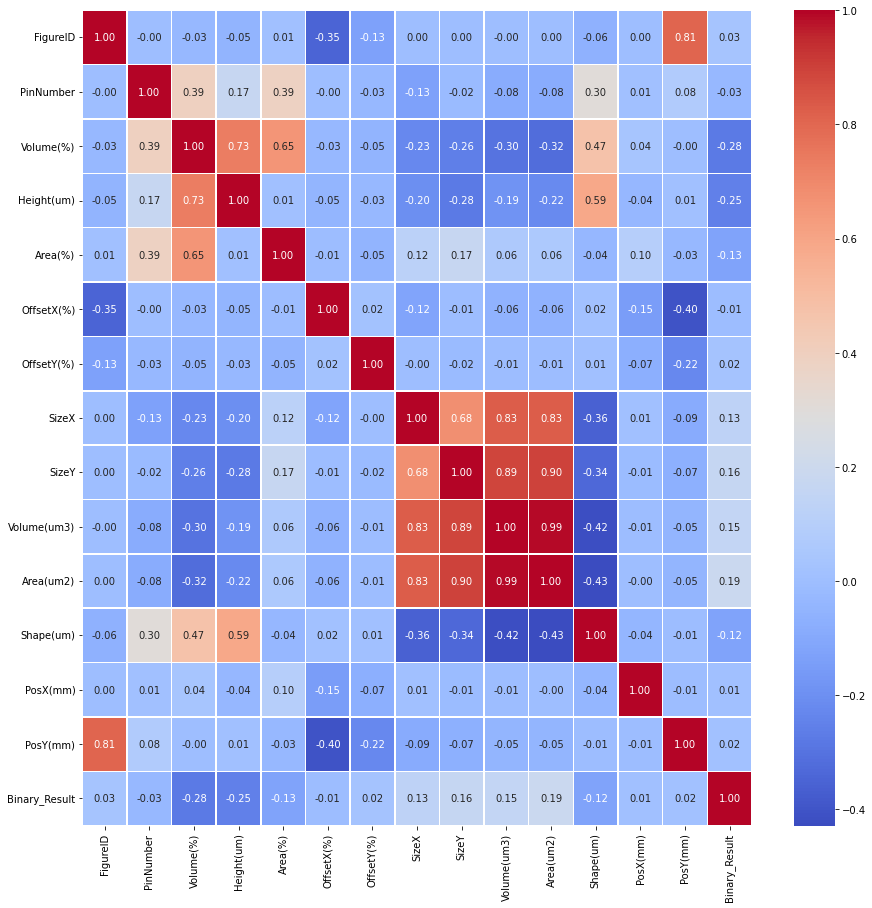

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data = spi.corr(), annot=True, 
    fmt = '.2f', linewidths=.5, cmap='coolwarm')
# 피어슨 상관계수 확인, 수치형 데이터만 유의미한 분석이 가능하므로 우측 하단의 데이터에 집중

# Component 별로 plot



>  Figure ID 는 동일한 PCB기판에서 shifting 하며 찍힘



In [20]:
spi.columns

Index(['PanelID', 'FigureID', 'ComponentID', 'PinNumber', 'PadID', 'PadType',
       'Volume(%)', 'Height(um)', 'Area(%)', 'OffsetX(%)', 'OffsetY(%)',
       'SizeX', 'SizeY', 'Volume(um3)', 'Area(um2)', 'Shape(um)', 'PosX(mm)',
       'PosY(mm)', 'Result', 'Binary_Result'],
      dtype='object')

In [21]:
spi_comp = spi.ComponentID.unique()

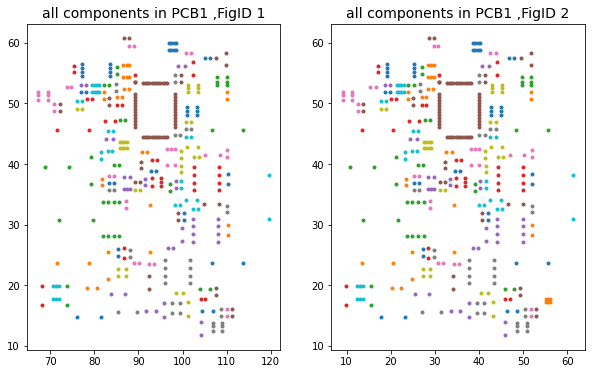

In [22]:
condition = (spi['PanelID']=='26919009800520102844') & (spi.FigureID == 2.0) # 1 PCB sample
pcb_sample = spi[condition]


plt.rcParams['figure.figsize'] = (10,6)
plt.subplot(1,2,1)
for c in spi_comp:
    temp = pcb_sample[(pcb_sample.ComponentID == c)]
    # plt.xlim(8,63)
    # plt.ylim(8,63)

    X = temp['PosX(mm)']
    Y = temp['PosY(mm)']
    plt.plot(X,Y,'.',label=c)
# plt.legend()
plt.title('all components in PCB1 ,FigID 1',fontsize=14)

condition = (spi['PanelID']=='25319088000520102844') & (spi.FigureID == 1.0) # 1 PCB sample
pcb_sample = spi[condition]

plt.subplot(1,2,2)
for c in spi_comp:
    temp = pcb_sample[(pcb_sample.ComponentID == c)]
    # plt.xlim(8,63)
    # plt.ylim(8,63)

    X = temp['PosX(mm)']
    Y = temp['PosY(mm)']
    plt.plot(X,Y,'.',label=c)
# plt.legend()
plt.title('all components in PCB1 ,FigID 2',fontsize=14)
plt.show()


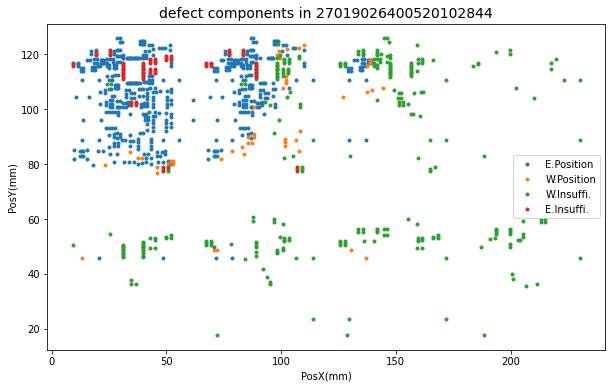

In [23]:
spi_defect = spi[spi.Result != 'GOOD']
fig_id = 4
condition  =  spi_defect.PanelID == '27019026400520102844'

pcb_sample = spi_defect[condition]

result = pcb_sample.Result.unique()
plt.rcParams['figure.figsize'] = (10,6)
for c in result:
    temp = pcb_sample[(pcb_sample.Result == c)]
    # plt.xlim(8,63)
    # plt.ylim(8,63)

    X = temp['PosX(mm)']
    Y = temp['PosY(mm)']
    
    plt.plot(X,Y,'.',label=c)
    plt.xlabel('PosX(mm)')
    plt.ylabel('PosY(mm)')
plt.legend()
plt.title('defect components in 27019026400520102844',fontsize=14)
plt.show()

# SPI Binary Result prediction

In [24]:
x = spi.drop(['PanelID','PadID','PadType','SizeY','Result','Binary_Result'],axis=1)
y = spi['Binary_Result']
x.fillna(0,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

component_list = x.ComponentID.unique()
# 레이블 인코더 객체 생성 
encoder = LabelEncoder() 
# 레이블 학습 
encoder.fit(component_list)
x.ComponentID = encoder.transform(x.ComponentID)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=34)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score # 정확도 함수

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=43,verbose=1,n_jobs=-1)
clf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   56.6s finished


RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1, random_state=43,
                       verbose=1)

In [28]:
y_valid.unique()

array([0, 1])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.7s finished


f1 score : 0.9950755418578943
accuracy : 0.9998772008818146


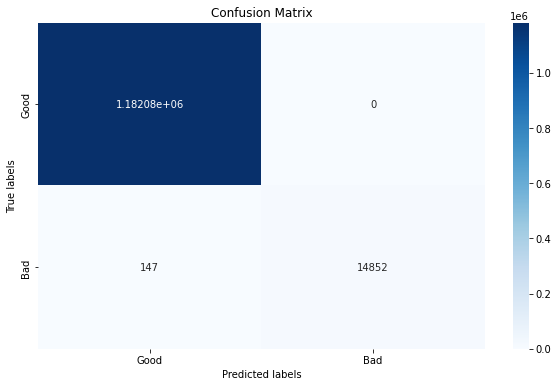

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix # 정확도 함수

predict1 = clf.predict(x_valid)
print('f1 score :',(f1_score(y_valid,predict1)))
print('accuracy :',(accuracy_score(y_valid,predict1)))

cm = confusion_matrix(y_valid,predict1)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Good', 'Bad']); ax.yaxis.set_ticklabels(['Good', 'Bad']);